# Introduction à la librairie Pandas

## A. Charger, importer, observer un tableau de données

[Pandas](https://pandas.pydata.org/docs/) est une librairie incontournable pour le traitement de tableaux de données en Python. Elle s'appuie principalement sur une nouvelle structure de données : le **<font color='red'>Dataframe</font>**!

Un Dataframe est un tableau :
- à *deux dimensions*,
- dont chaque ligne contient la description d'un *individu*
- dont chaque colonne correspond à un *descripteur* (on parlera aussi d'*attribut* ou *variable*)
- dont le type des données peut être différent d'une colonne à une autre (même type pour un même descripteur), **<font color='red'>$\Rightarrow$ différent d'un tableau NumPy</font>**
- possédant un index pour chaque axe (ligne et colonne)

On commencera par importer la librairie Pandas avec l'alias `pd` par convention : 

In [1]:
import pandas as pd

/tmp/ipykernel_47233/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


NB. Il vous faudra peut-être au préalable installer la librairie sur votre machine : `pip install Pandas`

Fini l'écriture de fonctions pour lire un fichier tablulaire (type .csv), Pandas définit des constructeurs de Dataframe directement à partir de tels fichiers : `pd.read_csv(`*nom_fichier*`)`, `pd.read_table(`*nom_fichier*`)`, `pd.read_excel(`*nom_fichier*`)`, etc. A vous de modifier éventuellement le paramétrage par défaut afin de vous conformer à la structure du fichier.

In [3]:
df = pd.read_csv('donnees/sommeil.csv')  # paramétrage par défaut

Quelques attributs utiles pour vérifier la *structure* de notre Dataframe `df`:

- `df.shape`: la forme du tableau (nb. lignes, nb. colonnes)
- `df.dtypes`: les types de données stockées dans chaque colonne du tableau
- `df.index`: l'index utilisé pour les lignes du tableau (par défaut les entiers 0, 1, 2, ...)
- `df.columns`: le nom (index) des colonnes du tableau (par défaut les en-têtes du fichier initial)

Affichez les (valeurs des) attributs de notre Dataframe `df`:


In [5]:
print(df.shape)
print(df.dtypes)
print(df.index)
print(df.columns)

(62, 11)
Species            object
Body.Weight       float64
Brain.Weight      float64
Non.Dreaming      float64
Dreaming          float64
Sleep             float64
Lifespan          float64
Gestation         float64
Predation           int64
Sleep.exposure      int64
Endangered          int64
dtype: object
RangeIndex(start=0, stop=62, step=1)
Index(['Species', 'Body.Weight', 'Brain.Weight', 'Non.Dreaming', 'Dreaming',
       'Sleep', 'Lifespan', 'Gestation', 'Predation', 'Sleep.exposure',
       'Endangered'],
      dtype='object')


Puis quelques méthodes bien utiles également pour commencer à vérifier le *contenu* de notre Dataframe `df`:

- `df.head(`*[nb]*`)` : renvoie une vue des `nb` __premières__ lignes du Dataframe (`nb`=5 par défaut)
- `df.tail(`*[nb]*`)` : renvoie une vue des `nb` __dernières__ lignes du Dataframe (`nb`=5 par défaut)
- `df.describe()` : renvoie un nouveau Dataframe contenant les statistiques de base sur chaque descripteur du tableau :
    - `count`: nombre de valeurs (parcequ'il peut y avoir des valeurs manquantes `NaN`)
    - `mean`: moyenne des valeurs
    - `std` : *standard deviation* (écart type)
    - `min`, `max` ainsi que les quartiles

Vérifiez le contenu de notre Dataframe `df` à l'aide de ces méthodes:

In [8]:
print(df.head(3))
print(df.tail(3))
df.describe()

                     Species  Body.Weight  Brain.Weight  Non.Dreaming  \
0           African elephant      6654.00        5712.0           NaN   
1  African giant pouched rat         1.00           6.6           6.3   
2                 Arctic Fox         3.39          44.5           NaN   

   Dreaming  Sleep  Lifespan  Gestation  Predation  Sleep.exposure  Endangered  
0       NaN    3.3      38.6      645.0          3               5           3  
1       2.0    8.3       4.5       42.0          3               1           3  
2       NaN   12.5      14.0       60.0          1               1           1  
                  Species  Body.Weight  Brain.Weight  Non.Dreaming  Dreaming  \
59                 Vervet         4.19          58.0           9.7       0.6   
60          Water opossum         3.50           3.9          12.8       6.6   
61  Yellow-bellied marmot         4.05          17.0           NaN       NaN   

    Sleep  Lifespan  Gestation  Predation  Sleep.exposure  End

,Body.Weight,Brain.Weight,Non.Dreaming,Dreaming,Sleep,Lifespan,Gestation,Predation,Sleep.exposure,Endangered
count,62.000000,62.000000,48.000000,50.000000,58.000000,58.000000,58.000000,62.000000,62.000000,62.000000
mean,198.790323,283.134194,8.672917,1.972000,10.532759,19.877586,142.353448,2.870968,2.419355,2.612903
std,899.157935,930.278942,3.666452,1.442651,4.606760,18.206255,146.805039,1.476414,1.604792,1.441252
min,0.010000,0.140000,2.100000,0.000000,2.600000,2.000000,12.000000,1.000000,1.000000,1.000000
25%,0.600000,4.250000,6.250000,0.900000,8.050000,6.625000,35.750000,2.000000,1.000000,1.000000
50%,3.345000,17.250000,8.350000,1.800000,10.450000,15.100000,79.000000,3.000000,2.000000,2.000000
75%,48.202500,166.000000,11.000000,2.550000,13.200000,27.750000,207.500000,4.000000,4.000000,4.000000
max,6654.000000,5712.000000,17.900000,6.600000,19.900000,100.000000,645.000000,5.000000,5.000000,5.000000


---

## B. Pandas et NumPy : c'est quoi le rapport?

Répétons-le, <font color='red'>les Dataframe et les tableaux NumPy sont deux structures de données différentes</font> :

|  Tableaux NumPy  |    Dataframe    |
| :---------------:|:---------------:|
| 1 à n dimensions |   2 dimensions  |
| données toutes de même type  | données hétérogènes (par colonne) |
| indexation par des entiers uniquement | indexation libre  |

C'est la raison pour laquelle nous ne pouvons pas accéder aux éléments d'un Dataframe comme nous le faisons pour un tableau NumPy : `df[0, 0]` renvoie une erreur!

Pour faire simple, Pandas définit une structure de données *series* qui est un vecteur NumPy auquel on ajoute un index (en complément de l'indexation naturelle par des entiers). Une *series* correspond à une colonne du Dataframe. Un Dataframe peut alors être vu comme un "dictionnaire" de *series* où :
- les clés sont les noms des colonnes
- les valeurs sont les *series*
- toutes les *series* ont le même index

<img src="images/sdd_Dataframe.jpg" alt="Structure de données Dataframe" height="350" style="display: block; margin: 0 auto"/>

On utilisera alors les syntaxes suivantes :
- `df['nom col']` pour récupérer toute la colonne (*series*) de nom `'nom col'`
- `df[`<font color='red'>**[**</font>`'nom col1', ..., 'nom coln'`<font color='red'>**]**</font>`]` pour récupérer une vue du Dataframe contenant plusieurs colonnes
- `df['nom col'][0:10]` pour récupérer les 10 premières valeurs de cette colonne
- `df['new col'] = ...` pour ajouter une nouvelle colonne au Dataframe (ajout d'une nouvelle clé dans le "dictionnaire")
- `df = df.set_index(keys)` ou `df.set_index(keys, inplace=True)` pour définir (ou remplacer) l'indexation des lignes du Dataframe

### Exercice 1 : sommeil léger

1. Créer une variable `noms` composée noms des 62 mamifères du Dataframe `df`. Quel est le type de cette variable?

In [12]:
noms = df["Species"]
print(noms)
print(type(noms))

0              African elephant
1     African giant pouched rat
2                    Arctic Fox
3        Arctic ground squirrel
4                Asian elephant
                ...            
57                   Tree hyrax
58                   Tree shrew
59                       Vervet
60                Water opossum
61        Yellow-bellied marmot
Name: Species, Length: 62, dtype: object
<class 'pandas.core.series.Series'>


2. Stocker dans `subpart` la projection du Dataframe `Df` sur les descripteurs : nom d'espèces (**Species**), poids (**Body.Weight**) et espérance de vie (**Lifespan**). Quel est le type de `subpart`?

In [13]:
subpart = df[["Species", "Body.Weight", "Lifespan"]]
print(subpart)
print(type(subpart))

                      Species  Body.Weight  Lifespan
0            African elephant      6654.00      38.6
1   African giant pouched rat         1.00       4.5
2                  Arctic Fox         3.39      14.0
3      Arctic ground squirrel         0.92       NaN
4              Asian elephant      2547.00      69.0
..                        ...          ...       ...
57                 Tree hyrax         2.00       7.5
58                 Tree shrew         0.10       2.3
59                     Vervet         4.19      24.0
60              Water opossum         3.50       3.0
61      Yellow-bellied marmot         4.05      13.0

[62 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>


3. Calculer le poids moyen et le poids median des animaux du Dataframe `df`. 

In [14]:
print(df["Body.Weight"].mean())
print(df["Body.Weight"].median())

198.79032258064518
3.3449999999999998


Nous allons creuser un peu pour découvrir les raisons de cette divergence moyenne vs. médiane...

4. Utiliser matplotlib (intégrée à Pandas) pour afficher la distribution des poids des animaux sous forme d'un histogramme [`df.plot.hist()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html)

<AxesSubplot:ylabel='Frequency'>

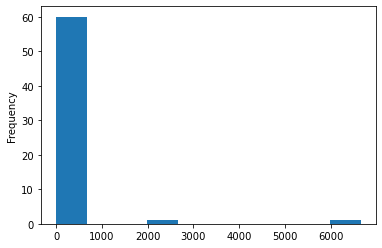

In [16]:
df["Body.Weight"].plot.hist()

5. Quels sont les (deux?) animaux dont le poids semble significativement supérieur aux autres?

In [20]:
df[['Species', 'Body.Weight']][df['Body.Weight'] > 1000]

,Species,Body.Weight
0,African elephant,6654.0
4,Asian elephant,2547.0


6. Utiliser les noms d'animaux pour indexer le Dataframe `df` puis afficher le diagramme en battons [`df.plot.bar(...)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html) des poids des animaux

<AxesSubplot:xlabel='Species'>

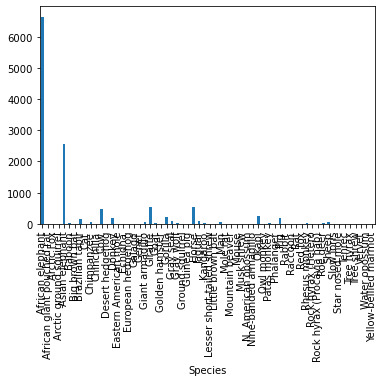

In [21]:
df = df.set_index(noms)
df.set_index(noms, inplace=True)
df['Body.Weight'].plot.bar()

7. Utiliser [`df.plot.scatter()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html) pour imaginer un graphique susceptible de répondre à ces questions :
    - existe-t'il une correlation entre le temps de sommeil paradoxal (**Dreaming**) et le temps de sommeil total (**Sleep**)?
    - les animaux les plus exposés à la prédation durant leur sommeil (**Sleep.exposure**) sont-ils ceux qui dorment le moins? 

<AxesSubplot:xlabel='Sleep', ylabel='Dreaming'>

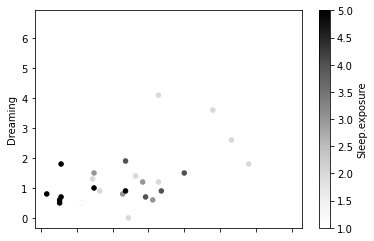

In [34]:
df.plot.scatter(x='Sleep', y='Dreaming', c='Sleep.exposure')

---

## C. Quelques stats simples... mais ciblées!

La colonne `Predation` décrit chaque animal selon 5 niveaux d'exposition à la prédation (1 = plus faible exposition et 5 = plus forte exposition). Imaginons que l'on cherche à savoir combien d'animaux sont à un niveau maximal (5) d'exposition à la prédation.

Quelle instruction écririez-vous pour obtenir ce résultat? (si, vous savez faire!...)

In [43]:
sum(df['Predation'] == 5)
df[df['Predation'] == 5].shape[0]

14

Imaginons que l'on cherche à connaître la durée moyenne de sommeil paradoxal (**Dreaming**) pour ce groupe d'animaux en particulier.
Allez-y... 

In [39]:
df["Dreaming"][df["Predation"] == 5].mean()

1.0818181818181818

Imaginons (toujours!), que l'on cherche à savoir si le degré d'exposition à la prédation d'une espèce influence sa durée de sommeil paradoxal (**Dreaming**). Nous alors devoir refaire les calculs précédents pour chacun des cinq niveaux de prédation &#x1F624;



Voici une nouvelle méthode très utile en analyse des données :
- `df.value_counts(subset)` qui retourne une *Series* contenant le nombre d'observations de chaque ligne unique dans le Dataframe restreint au `subset` de colonnes

Par exemple : l'instruction `df.value_counts('Predation')` construit alors une *Series* de taille 5 contenant pour chaque niveau d'exposition, le nombre d'animaux concernés.

In [45]:
res = df.value_counts('Predation')
print(res)

Predation
2    15
1    14
5    14
3    12
4     7
Name: count, dtype: int64


De même, la colonne `Sleep.exposure` contient cette fois l'indice d'exposition *durant le sommeil*. L'instruction `df.value_counts(['Predation', 'Sleep.exposure'])` construit alors une *Series* de taille au plus 25 (5x5) contenant pour chaque combinaison observée, le nombre d'animaux concernés.  

Predation  Sleep.exposure
1          1                 10
5          5                  9
2          1                  7
           2                  7
3          1                  7
           5                  3
4          4                  3
1          2                  2
5          2                  2
4          1                  2
3          2                  2
1          4                  1
4          3                  1
           5                  1
5          1                  1
2          3                  1
5          3                  1
           4                  1
1          3                  1
Name: count, dtype: int64


<AxesSubplot:xlabel='Predation,Sleep.exposure'>

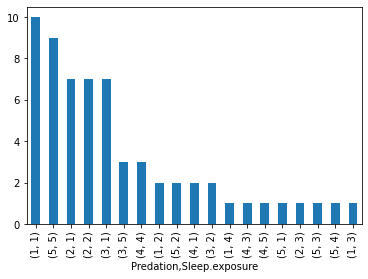

In [46]:
res = df.value_counts(['Predation', 'Sleep.exposure'])
print(res)
res.plot.bar()

> étudiez l'index de la *series* retournée par `.value_counts()` lorsqu'il y a plusieurs descripteurs... vous remarquerez que l'index d'une *Series* (et donc d'un *Dataframe*) peut être un *tuple* (index multiple)

On remarquera que les deux combinaisons les plus fréquentes correspondent aux animaux :
- soit très peu exposés : en général (1) et durant leur sommeil (1) $\rightarrow$ 10 individus
- soit très exposés : en général (5) et durant leur sommeil (5) $\rightarrow$ 9 individus


`value_counts(subset)` permet donc de constituer des *groupes* d'individus et de compter la taille de chacun des groupes. La méthode `groupby()` permet d'aller un peu plus loin en appliquant des routines statistiques sur ces *groupes* d'individus.

Ainsi l'instruction `df.groupby('Predation').mean()` renvoie un nouveau Dataframe de 5 lignes, indexé par les 5 valeurs de l'attribut `Predation`. Chaque ligne décrit alors un *groupe* d'individus selon les mêmes descripteurs qu'initialement. La méthode `mean()` utilisée ici définit la valeur qui sera calculée pour décrire le groupe selon chaque descripteur.

Revenons alors à notre question initiale : le degré d'exposition à la prédation d'une espèce influence-t'il sa durée de sommeil paradoxal (**Dreaming**)?

---

## D. Des requêtes avancées

### Exercice 2 : de gros dormeurs qui ne devraient peut-être pas...

1. Commencez par restreindre votre Dataframe aux descripteurs suivants :
- `Sleep` : durée de sommeil quotidien
- `Predation` : indice d'exposition à la prédation (en général)
- `Sleep.exposure` : indice d'exposition à la prédation durant le sommeil
- `Endangered` : indice d'extinction (espèce en voie de disparition)

In [47]:
df2 = df[['Sleep', 'Predation', 'Sleep.exposure', 'Endangered']]

2. Dans ce Dataframe, il y a 4 espèces dont la durée de sommeil n'est pas donnée (valeurs manquantes). Utilisez la méthode [`.isna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html?highlight=isna#pandas.DataFrame.isna) pour les identifier puis la méthode [`.dropna(`*axis*`)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html?highlight=dropna#pandas.DataFrame.dropna) pour les supprimer

In [50]:
df2[df2['Sleep'].isna()]
df2 = df2.dropna(axis=0)
df2[df2['Sleep'].isna()]
df2.dropna(axis=0, inplace=True)

3. Affichez les animaux qui dorment plus de 10 heures par jour

In [49]:
df2[df2['Sleep']>10]

,Sleep,Predation,Sleep.exposure,Endangered
Species,,,,
Arctic Fox,12.5,1,1,1
Arctic ground squirrel,16.5,5,2,3
Big brown bat,19.7,1,1,1
Cat,14.5,1,2,1
Chinchilla,12.5,5,4,4
Desert hedgehog,10.3,2,1,2
European hedgehog,10.7,2,2,2
Galago,10.7,2,2,2
Giant armadillo,18.1,1,1,1


4. Affichez les "gros dormeurs" c'est-à-dire les animaux qui dorment plus que l'Homme (`Man`)

In [52]:
df2[df2['Sleep']>df2['Sleep']["Man"]]

,Sleep,Predation,Sleep.exposure,Endangered
Species,,,,
African giant pouched rat,8.3,3,1,3
Arctic Fox,12.5,1,1,1
Arctic ground squirrel,16.5,5,2,3
Baboon,9.8,4,4,4
Big brown bat,19.7,1,1,1
Cat,14.5,1,2,1
Chimpanzee,9.7,1,1,1
Chinchilla,12.5,5,4,4
Desert hedgehog,10.3,2,1,2


5. Affichez le nombre de "gros dormeurs" pour chaque niveau d'exposition à la prédation (**Predation**)

In [53]:
df2[df2['Sleep']>df2['Sleep']["Man"]].groupby('Predation').count()

,Sleep,Sleep.exposure,Endangered
Predation,,,
1,11,11,11
2,14,14,14
3,6,6,6
4,6,6,6
5,6,6,6


6. Affichez le nombre de "gros dormeurs" en voie de disparition (**Endangered**>3) pour chaque niveau d'exposition à la prédation (**Predation**)

In [57]:
df2[(df2['Sleep']>df2['Sleep']["Man"])&(df2['Endangered']>3)].groupby('Predation').count()['Sleep']

Predation
4    4
5    4
Name: Sleep, dtype: int64

7. Affichez le nombre de "gros dormeurs" en voie de disparition (**Endangered**>3) pour chaque combinaison de niveau d'exposition à la prédation en général et durant le sommeil (**Predation** et **Sleep.exposure**)

In [58]:
df2[(df2['Sleep']>df2['Sleep']["Man"])&(df2['Endangered']>3)].groupby(['Predation', 'Sleep.exposure'])['Endangered'].count()

Predation  Sleep.exposure
4          3                 1
           4                 3
5          2                 1
           3                 1
           4                 1
           5                 1
Name: Endangered, dtype: int64

8. D'après cette analyse, identifiez le(s) gros dormeur(s) qui ne devraient pas l'être? Et ceux qui ont tout intérêt à l'être?

In [60]:
print((df2['Sleep']>df2['Sleep']['Man'])&(df2['Endangered']>3)&(df2['Predation']==5)&(df2['Sleep.exposure']==5).index)
print((df2['Sleep']>df2['Sleep']['Man'])&(df2['Endangered']>3)&(df2['Predation']==5)&(df2['Sleep.exposure']==2).index)

Species
African elephant             False
African giant pouched rat    False
Arctic Fox                   False
Arctic ground squirrel       False
Asian elephant               False
Baboon                       False
Big brown bat                False
Brazilian tapir              False
Cat                          False
Chimpanzee                   False
Chinchilla                    True
Cow                          False
Desert hedgehog              False
Donkey                       False
Eastern American mole        False
Echidna                      False
European hedgehog            False
Galago                       False
Genet                        False
Giant armadillo              False
Goat                         False
Golden hamster               False
Gorilla                      False
Gray seal                    False
Gray wolf                    False
Ground squirrel              False
Guinea pig                    True
Horse                        False
Jaguar      

---

## E. Deux méthodes bien utiles : .iloc() et .loc()

Au risque de se répéter, un Dataframe n'est pas un tableau NumPy! De fait, dans un Dataframe il n'est pas possible d'utiliser la double indexation `df[num. lignes, num. colonnes]` comme nous avons appris à le faire pour un tableau NumPy, bien qu'il serait parfois pratique de pouvoir le faire...

La méthode `.iloc()` a été prévue pour cela. Ainsi il sera possible de sléctionner une vue d'un Dataframe `df` à partir des indices entiers des lignes et des colonnes par l'instruction `df.iloc[num. lignes, num. colonnes]`.

De même, la méthode `.loc()`permet de sélectionner une vue d'un Dataframe `df` à partir des noms des lignes et des noms des colonnes par l'instruction `df.loc[noms lignes, noms colonnes]`.

Par exemple, l'instruction `df.iloc[0, 0]` renvoie la valeur du premier individu sur le premier descripteur :

In [61]:
df.iloc[0, 0]

'African elephant'

L'instruction `df.iloc[:10, -3:]` renvoie les valeurs des 10 premiers individus sur les 3 derniers descripteurs :

In [62]:
df.iloc[:10, -3:]

,Predation,Sleep.exposure,Endangered
Species,,,
African elephant,3,5,3
African giant pouched rat,3,1,3
Arctic Fox,1,1,1
Arctic ground squirrel,5,2,3
Asian elephant,3,5,4
Baboon,4,4,4
Big brown bat,1,1,1
Brazilian tapir,4,5,4
Cat,1,2,1


L'instruction `df.loc['Man', 'Brain.Weight']` renvoie le poids moyen en grammes du cerveau (**Brain.Weight**) de l'Homme (**Man**):

In [63]:
df.loc['Man', 'Brain.Weight']

1320.0

L'instruction `df.loc[['Man', 'Horse'], ['Brain.Weight', 'Body.Weight']]` renvoie le poids moyen du cerveau (**Brain.Weight**) et du corps (**Body.Weight**) de l'Homme (**Man**) et du cheval (**Horse**):

In [64]:
df.loc[['Man', 'Horse'], ['Brain.Weight', 'Body.Weight']]

,Brain.Weight,Body.Weight
Species,,
Man,1320.0,62.0
Horse,655.0,521.0


---

## F. Exercice d'exploration

> 
> Nous allons analyser un nouveau tableau de données répertoriant des informations sur plusieurs centaines de passagers du Titanic dont :
> - leur identité, sexe, âge
> - leur classe sur le bateau (1ère classe $\rightarrow$ 3ème classe)
> - le fait qu'ils aient ou non survécu au naufrage
> - ...

1. Chargez le jeu de données *titanic.csv* et utilisez quelques commandes de base afin de connaître le nombre d'individus, le nombre et la nature des descripteurs, les statistiques de base ainsi que les éventuelles données manquantes

In [75]:
data = pd.read_csv('donnees/titanic.csv', delimiter=';')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. On ne s'intéressera qu'aux descripteurs suivants : `Pclass`, `Sex`, `Age` et `Survival`. Modifiez le Dataframe en conséquence puis supprimez les individus pour lesquels des données sont manquantes

In [76]:
data = data[["Pclass", "Sex", "Age", "Survived"]]

3. Combien y-a-t'il eu de survivants parmi les passagers restants? Quel est le taux de survie?

In [77]:
import numpy as np
print(sum(data['Survived'] == 1))
print(np.round(data['Survived'].mean(), 2))

342
0.38


4. Les enfants ont ils été sauvés en priorité? Est-ce que la formule *les femmes et les enfants d'abord* semble avoir été repectée?

In [79]:
data.groupby(data['Age']<18)["Survived"].mean()
data.groupby(data['Age']>18, 'Sex'=='female')['Survived'].mean()

/tmp/ipykernel_47233/517738990.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  data.groupby(data['Age']>18, 'Sex'=='female')['Survived'].mean()


Age
False    0.386076
True     0.382609
Name: Survived, dtype: float64

5. Une hiérarchie de classe a-t'elle joué durant le sauvetage?